<a href="https://colab.research.google.com/github/DarshanBothra/PyTorch-Deep-Learning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# !pip list
import torch as pt
import numpy as np

In [33]:
# 1-D Array
my_list1 = [
    1, 2, 3, 4, 5
]

# 2-D Array
my_list2 = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]



In [34]:
np1 = np.random.rand(3) # 1-D numpy array

tensor_2d = pt.randn(3, 4) # 2-D Tensor
tensor_3d = pt.zeros(2, 3, 4) # 3-D Tensor

# Create tensor with numpy array
tensor_1d = pt.tensor(np1)

print(tensor_2d)
print(tensor_2d.dtype)
print(tensor_3d)
print(tensor_3d.dtype)
print(tensor_1d)
print(tensor_1d.dtype)


tensor([[ 0.1856, -0.7798, -1.4723, -1.8088],
        [-0.1287,  0.9819, -1.0504, -2.1112],
        [-1.6784, -1.0515,  0.1677, -1.3358]])
torch.float32
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
torch.float32
tensor([0.6281, 0.1328, 0.1511], dtype=torch.float64)
torch.float64


In [35]:
my_torch = pt.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [36]:
# Reshape and View
my_torch = my_torch.reshape(2, 5)

my_torch2 = pt.arange(10)
my_torch2 = my_torch2.reshape(2, -1) # -1 will take len(tensor)/2 elemnets automatically
my_torch2
my_torch3 = my_torch2.view(-1, 2)
my_torch4 = my_torch3.reshape(5, 2)
my_torch3.shape, my_torch4.shape

# Difference between reshape and view
# View will reshape the tensor without changing the memory allocation for the tensors!
# Reshape will reshape the tensor, it might change the memory allocation for the tensor though!
my_torch5 = pt.arange(10)
my_torch5
my_torch6 = my_torch5.view(2, 5)
my_torch5[1] = 4141
my_torch5
my_torch6
# Slicing

my_torch7 = pt.arange(10)

# Specific Item
print(my_torch7[7])
print()
# Slicing
my_torch8 = my_torch7.reshape(5, 2)
print(my_torch8)
print()
print(my_torch8[:3,1:])
print()

tensor(7)

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

tensor([[1],
        [3],
        [5]])



In [37]:
# Mathematics for Tensors

tensor_a = pt.tensor([1, 2, 3, 4])
tensor_b = pt.tensor([5, 6, 7, 8])

# Addition
print("addition: ", pt.add(tensor_a, tensor_b))

# Subtraction
print("subtraction: ", pt.sub(tensor_a, tensor_b))

# Multiplication
print("mutliplication : ", pt.mul(tensor_a, tensor_b)) # corresponding terms are multiplied in the matrices, this is not matrix multiplication

# Division
print("division: ", pt.div(tensor_a, tensor_b))

# Modulus
print("modulus: ", pt.remainder(tensor_a, tensor_b))

# Exponent
print("exponent: ", pt.pow(tensor_a, tensor_b))

# Reassignment
# tensor_a.add_(tensor_b) # Weird
tensor_a += tensor_b
tensor_a

addition:  tensor([ 6,  8, 10, 12])
subtraction:  tensor([-4, -4, -4, -4])
mutliplication :  tensor([ 5, 12, 21, 32])
division:  tensor([0.2000, 0.3333, 0.4286, 0.5000])
modulus:  tensor([1, 2, 3, 4])
exponent:  tensor([    1,    64,  2187, 65536])


tensor([ 6,  8, 10, 12])

In [38]:
# Basic Neural Network

# Iris dataset (flower classification)

import torch as pt
import torch.nn as nn
import torch.nn.functional as F


In [39]:
# Create a Model Class (inherits the nn module)

class Model(nn.Module):
  # Input Layer having the 4 features of flowers -->
  # H1 -->
  # H2 -->
  # Output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1) # Fully connected Layer 1

    self.fc2 = nn.Linear(h1, h2) # Fully connected Layer 2

    self.out = nn.Linear(h2, out_features) # Output Layer

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x



In [220]:
seed = pt.manual_seed(75)

# Create an instance of the model
model = Model()



In [221]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [222]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Change last column from string to integer categories

"""
0 - Setosa
1 - Versicolor
2 - Virginica
"""

df.loc[df['species'] == 'setosa', 'species'] = 0.0
df.loc[df['species'] =='versicolor', 'species'] = 1.0
df.loc[df['species'] == 'virginica', 'species'] = 2.0

X = df.drop('species', axis = 1).values # featuers
y = list(df['species'].values) # Species


In [223]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 75)

X_train = pt.FloatTensor(X_train)
X_test = pt.FloatTensor(X_test)

y_train = pt.LongTensor(y_train)
y_test = pt.LongTensor(y_test)
# Chose loss function

lossFN = nn.CrossEntropyLoss() # We are using a cross entropy loss function

# Choose optimizer, learning rate (if error doesn't go down after a bunch of epochs, we will lower this! like if a child doesn't learn fast teach him slow! (more epoches))

optimizer = pt.optim.Adam(model.parameters(), lr = 0.03)

print(list(y_train).count(0), list(y_train).count(1), list(y_train).count(2))
print(list(y_test).count(0), list(y_test).count(1), list(y_test).count(2))



40 40 40
10 10 10


tensor(0.0492, grad_fn=<NllLossBackward0>)


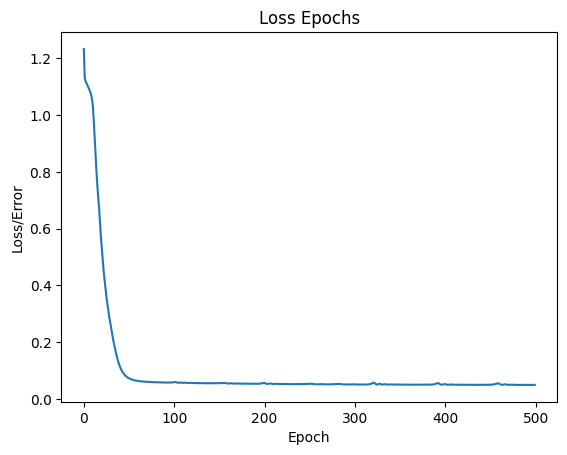

In [224]:
# Training the model

# Epoches? - a run through all the training data in our network

epochs = 500
losses = []

for i in range(epochs):
  # Go Forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results for the training data
  # Measure the loss
  loss = lossFN(y_pred, y_train)

  # Keep appending losses
  losses.append(loss.detach().numpy())

  # Do back-propogation so that the model can learn from its mistakes!
  # Take the error rate of forward propogation and feed it back throught the network to finetune the weights

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
loss = lossFN(y_pred, y_train)
print(loss)
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")
plt.title("Loss Epochs")
plt.show()

In [225]:
with pt.no_grad(): # Turns off back propogation
  y_eval = model.forward(X_test)
  loss = lossFN(y_eval,y_test)
print(loss)


tensor(0.0045)


In [228]:
correct = 0
with pt.no_grad():
  for i, data in enumerate(X_test):
    y_eval = model.forward(data)

    # What type of flower our network thinks it is!
    print(f"{i+1}) {list(y_eval).index(max(list(y_eval)))}")
  # Correct or not?
    if y_eval.argmax().item() == y_test[i]:
      print("Correct")
      correct +=1
    else:
      print(f"Incorrect: {y_test[i]}")
print(f"{correct}/30 Correct!")


1) 2
Correct
2) 2
Correct
3) 1
Correct
4) 1
Correct
5) 1
Correct
6) 0
Correct
7) 0
Correct
8) 1
Correct
9) 0
Correct
10) 1
Correct
11) 2
Correct
12) 0
Correct
13) 2
Correct
14) 0
Correct
15) 1
Correct
16) 2
Correct
17) 2
Correct
18) 2
Correct
19) 1
Correct
20) 2
Correct
21) 0
Correct
22) 1
Correct
23) 2
Correct
24) 0
Correct
25) 0
Correct
26) 1
Correct
27) 1
Correct
28) 2
Correct
29) 0
Correct
30) 0
Correct
30/30 Correct!


In [234]:
# Feeding new data to our neural network!

new_iris = pt.tensor([4.7, 3.2, 1.3, 0.2])

with pt.no_grad():
  print(model(new_iris).argmax())


newer_iris = pt.tensor([5.9, 3.0, 5.1, 1.8])

with pt.no_grad():
  print(model(newer_iris).argmax())

tensor(0)
tensor(2)
